In [13]:
from dotenv import load_dotenv
from pathlib import Path
import yfinance as yf
import pandas as pd
import numpy as np
import plotly 
import plotly.express as px
from matplotlib import pyplot as plt
from finta import TA
import hvplot.pandas

# import panel as pn

# from pathlib import Path
# import holoviews as hv
# import seaborn as sns
# from pandas_datareader import data
# from MCForecastTools import MCSimulation
# import alpaca_trade_api as tradeapi
%matplotlib inline


In [14]:
# ticker_list = ['AGG','VTI', 'VOO', 'QQQ', 'XLE', 'IWM', 'IYY', 'XLF', 'UUP', 'DJT', 'GSG']
ticker_list = ['FB']

In [15]:
df_price = yf.download(ticker_list,period='5y')
df_price = df_price.drop(labels='Adj Close', axis=1)
df_price.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [16]:
columns= ["open", "high", "low", "close", "volume"]
df_price.columns = columns
df_price.head()

,open,high,low,close,volume
Date,,,,,
2017-03-13,138.710007,139.679993,138.669998,139.600006,10955500
2017-03-14,139.460007,139.460007,138.520004,139.320007,12944000
2017-03-15,139.289993,140.100006,138.490005,139.720001,19344800
2017-03-16,140.199997,140.250000,139.729996,139.990005,13612900
2017-03-17,140.339996,140.339996,139.699997,139.839996,20592800


In [17]:
ema_21 = TA.EMA(df_price, 21) 
ema_50 = TA.EMA(df_price, 50)
ema_200 = TA.EMA(df_price, 200)
df_price_close = df_price['close']
ema_df = pd.concat([ema_21, ema_50,ema_200,df_price_close], axis="columns", join="inner")

#Rename Columns
columns_ema= ["21EMA", "50EMA", "200EMA", "close"]
ema_df.columns = columns_ema
ema_df.head()
ema_df



,21EMA,50EMA,200EMA,close
Date,,,,
2017-03-13,139.600006,139.600006,139.600006,139.600006
2017-03-14,139.453340,139.457207,139.459307,139.320007
2017-03-15,139.550820,139.548332,139.547075,139.720001
2017-03-16,139.676775,139.665462,139.659474,139.990005
2017-03-17,139.715918,139.703216,139.696304,139.839996
...,...,...,...,...
2022-03-04,224.260148,260.941169,304.621360,200.059998
2022-03-07,220.915589,258.059946,303.455670,187.470001
2022-03-08,218.131444,255.402301,302.329640,190.289993


Text(0, 0.5, 'Price in $')

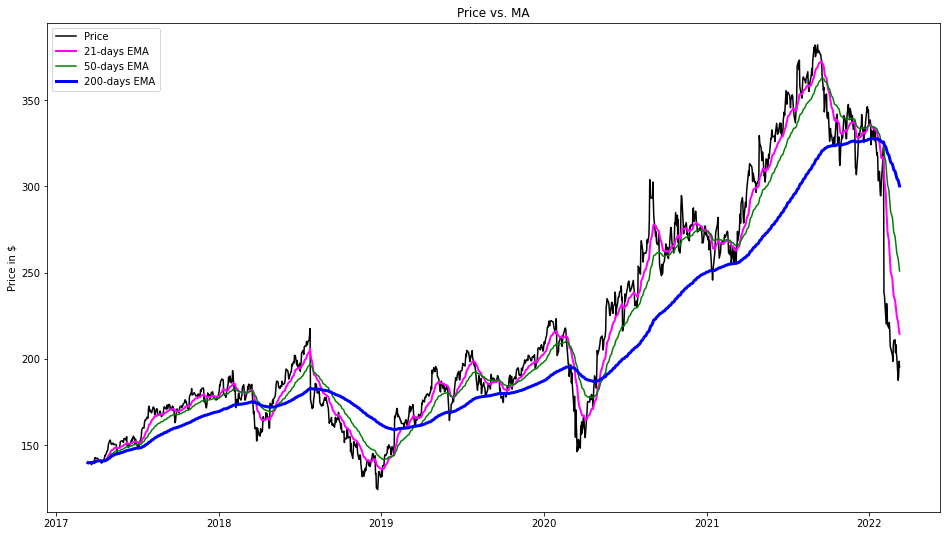

In [18]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ema_df['close'], label='Price', color='black',linewidth=1.5)
ax.plot(ema_df['21EMA'], label = '21-days EMA', color='magenta',linewidth=2)
ax.plot(ema_df['50EMA'], label = '50-days EMA', color='green')
ax.plot(ema_df['200EMA'], label = '200-days EMA',color='blue',linewidth=3)


ax.legend(loc='best')
ax.title.set_text('Price vs. MA')
ax.set_ylabel('Price in $')
# ax.xaxis.set_major_formatter(my_year_month_fmt)

In [19]:
ema_df['%_away_21'] = ((ema_df['close']- ema_df['21EMA'])/((ema_df['close']+ema_df['21EMA'])/2))*100
ema_df['%_away_50'] = ((ema_df['close']- ema_df['50EMA'])/((ema_df['close']+ema_df['50EMA'])/2))*100
ema_df['%_away_200'] = ((ema_df['close']- ema_df['200EMA'])/((ema_df['close']+ema_df['200EMA'])/2))*100
ema_df

,21EMA,50EMA,200EMA,close,%_away_21,%_away_50,%_away_200
Date,,,,,,,
2017-03-13,139.600006,139.600006,139.600006,139.600006,0.000000,0.000000,0.000000
2017-03-14,139.453340,139.457207,139.459307,139.320007,-0.095657,-0.098429,-0.099935
2017-03-15,139.550820,139.548332,139.547075,139.720001,0.121159,0.122942,0.123843
2017-03-16,139.676775,139.665462,139.659474,139.990005,0.224003,0.232103,0.236390
2017-03-17,139.715918,139.703216,139.696304,139.839996,0.088768,0.097860,0.102807
...,...,...,...,...,...,...,...
2022-03-04,224.260148,260.941169,304.621360,200.059998,-11.406553,-26.412589,-41.436586
2022-03-07,220.915589,258.059946,303.455670,187.470001,-16.379416,-31.688081,-47.251825
2022-03-08,218.131444,255.402301,302.329640,190.289993,-13.633687,-29.218503,-45.487284


In [20]:
# temp_index1 =ema_df.set_index(['date'])
# temp_index1

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

MA_moves = ema_df.drop(columns=["21EMA","50EMA","200EMA","close"])
# Fit the StandardScaler
scaler.fit(MA_moves)

# Scale the data
scaled_data = scaler.transform(MA_moves)

# # Create a DataFrame with the scaled data
MA_scaled = pd.DataFrame(scaled_data)
MA_scaled.index = ema_df.index
MA_scaled

#Drop Column
# MA_scaled = MA_scaled.drop(columns=[0])
# MA_scaled


,0,1,2
Date,,,
2017-03-13,0.658776,0.632638,0.587381
2017-03-14,0.656472,0.630811,0.586139
2017-03-15,0.661694,0.634920,0.588920
2017-03-16,0.664172,0.636946,0.590319
2017-03-17,0.660914,0.634454,0.588659
...,...,...,...
2022-03-04,0.384001,0.142355,0.072288
2022-03-07,0.264209,0.044428,0.000000
2022-03-08,0.330351,0.090270,0.021935


In [22]:
#Rename Columns
columns_MA= ["scaled_21EMA", "scaled_50EMA", "scaled_200EMA"]
MA_scaled.columns = columns_MA
MA_scaled


,scaled_21EMA,scaled_50EMA,scaled_200EMA
Date,,,
2017-03-13,0.658776,0.632638,0.587381
2017-03-14,0.656472,0.630811,0.586139
2017-03-15,0.661694,0.634920,0.588920
2017-03-16,0.664172,0.636946,0.590319
2017-03-17,0.660914,0.634454,0.588659
...,...,...,...
2022-03-04,0.384001,0.142355,0.072288
2022-03-07,0.264209,0.044428,0.000000
2022-03-08,0.330351,0.090270,0.021935


In [23]:
ema_df_final = pd.concat([ema_df, MA_scaled], axis="columns", join="inner")
ema_df_final

,21EMA,50EMA,200EMA,close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA
Date,,,,,,,,,,
2017-03-13,139.600006,139.600006,139.600006,139.600006,0.000000,0.000000,0.000000,0.658776,0.632638,0.587381
2017-03-14,139.453340,139.457207,139.459307,139.320007,-0.095657,-0.098429,-0.099935,0.656472,0.630811,0.586139
2017-03-15,139.550820,139.548332,139.547075,139.720001,0.121159,0.122942,0.123843,0.661694,0.634920,0.588920
2017-03-16,139.676775,139.665462,139.659474,139.990005,0.224003,0.232103,0.236390,0.664172,0.636946,0.590319
2017-03-17,139.715918,139.703216,139.696304,139.839996,0.088768,0.097860,0.102807,0.660914,0.634454,0.588659
...,...,...,...,...,...,...,...,...,...,...
2022-03-04,224.260148,260.941169,304.621360,200.059998,-11.406553,-26.412589,-41.436586,0.384001,0.142355,0.072288
2022-03-07,220.915589,258.059946,303.455670,187.470001,-16.379416,-31.688081,-47.251825,0.264209,0.044428,0.000000
2022-03-08,218.131444,255.402301,302.329640,190.289993,-13.633687,-29.218503,-45.487284,0.330351,0.090270,0.021935


In [24]:
ema_df_final['signal_21']=0
ema_df_final['signal_50']=0
ema_df_final['signal_200']=0
ema_df_final

,21EMA,50EMA,200EMA,close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200
Date,,,,,,,,,,,,,
2017-03-13,139.600006,139.600006,139.600006,139.600006,0.000000,0.000000,0.000000,0.658776,0.632638,0.587381,0,0,0
2017-03-14,139.453340,139.457207,139.459307,139.320007,-0.095657,-0.098429,-0.099935,0.656472,0.630811,0.586139,0,0,0
2017-03-15,139.550820,139.548332,139.547075,139.720001,0.121159,0.122942,0.123843,0.661694,0.634920,0.588920,0,0,0
2017-03-16,139.676775,139.665462,139.659474,139.990005,0.224003,0.232103,0.236390,0.664172,0.636946,0.590319,0,0,0
2017-03-17,139.715918,139.703216,139.696304,139.839996,0.088768,0.097860,0.102807,0.660914,0.634454,0.588659,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,224.260148,260.941169,304.621360,200.059998,-11.406553,-26.412589,-41.436586,0.384001,0.142355,0.072288,0,0,0
2022-03-07,220.915589,258.059946,303.455670,187.470001,-16.379416,-31.688081,-47.251825,0.264209,0.044428,0.000000,0,0,0
2022-03-08,218.131444,255.402301,302.329640,190.289993,-13.633687,-29.218503,-45.487284,0.330351,0.090270,0.021935,0,0,0


In [25]:
# Generate the trading signal 1 or 0,
# where 1 is when the EMA21 is less than 0.1 (represents 10%tile)
#Do a check that is 2 weeks out

percentile_21 = 0.1
percentile_50 = 0.1
percentile_200 = 0.1

ema_df_final["signal_21"]= np.where(
    ema_df_final["scaled_21EMA"] < percentile_21, 1.0, 0.0
)
ema_df_final["signal_50"]= np.where(
    ema_df_final["scaled_50EMA"] < percentile_50, 1.0, 0.0
)
ema_df_final["signal_200"]= np.where(
    ema_df_final["scaled_200EMA"] < percentile_200, 1.0, 0.0
)


ema_df_final.tail(10)
# # Calculate the points in time at which a position should be taken, 1 or -1
# ema_signals_df["Entry/Exit"] = ema_signals_df["Signal"].diff()

# # Review the DataFrame
# ema_signals_df.head()

,21EMA,50EMA,200EMA,close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200
Date,,,,,,,,,,,,,
2022-02-25,236.198909,273.339079,309.724654,210.479996,-11.515616,-25.984541,-38.156006,0.381374,0.150300,0.113069,0.0,0.0,0.0
2022-02-28,233.910826,270.895586,308.742614,211.029999,-10.284886,-24.844328,-37.598216,0.411021,0.171465,0.120003,0.0,0.0,0.0
2022-03-01,231.145297,268.252230,307.695320,203.490005,-12.725746,-27.456615,-40.770073,0.352223,0.122975,0.080574,0.0,0.0,1.0
2022-03-02,229.051179,265.893711,306.704418,208.110001,-9.580530,-24.381121,-38.302897,0.427989,0.180064,0.111243,0.0,0.0,0.0
2022-03-03,226.680163,263.426114,305.672231,202.970001,-11.036962,-25.924793,-40.382895,0.392904,0.151409,0.085387,0.0,0.0,1.0
2022-03-04,224.260148,260.941169,304.621360,200.059998,-11.406553,-26.412589,-41.436586,0.384001,0.142355,0.072288,0.0,0.0,1.0
2022-03-07,220.915589,258.059946,303.455670,187.470001,-16.379416,-31.688081,-47.251825,0.264209,0.044428,0.000000,0.0,1.0,1.0
2022-03-08,218.131444,255.402301,302.329640,190.289993,-13.633687,-29.218503,-45.487284,0.330351,0.090270,0.021935,0.0,1.0,1.0
2022-03-09,216.346767,253.170838,301.296505,198.500000,-8.604029,-24.208266,-41.135344,0.451512,0.183272,0.076033,0.0,0.0,1.0


In [26]:
ema_df_final['close+20']= ema_df_final['close'].shift(20)
ema_df_final=ema_df_final.dropna()
ema_df_final





,21EMA,50EMA,200EMA,close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20
Date,,,,,,,,,,,,,,
2017-04-10,141.092052,140.878279,140.736463,141.039993,-0.036904,0.114724,0.215441,0.657887,0.634767,0.590059,0.0,0.0,0.0,139.600006
2017-04-11,140.970579,140.814070,140.695325,139.919998,-0.748036,-0.636953,-0.552590,0.640756,0.620814,0.580512,0.0,0.0,0.0,139.320007
2017-04-12,140.828270,140.733617,140.641313,139.580002,-0.890322,-0.823089,-0.757480,0.637329,0.617359,0.577965,0.0,0.0,0.0,139.720001
2017-04-13,140.682744,140.648240,140.582960,139.389999,-0.923149,-0.898621,-0.852197,0.636538,0.615957,0.576787,0.0,0.0,0.0,139.990005
2017-04-17,140.756582,140.696115,140.620613,141.419998,0.470214,0.513181,0.566859,0.670103,0.642164,0.594427,0.0,0.0,0.0,139.839996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,224.260148,260.941169,304.621360,200.059998,-11.406553,-26.412589,-41.436586,0.384001,0.142355,0.072288,0.0,0.0,1.0,237.759995
2022-03-07,220.915589,258.059946,303.455670,187.470001,-16.379416,-31.688081,-47.251825,0.264209,0.044428,0.000000,0.0,1.0,1.0,237.089996
2022-03-08,218.131444,255.402301,302.329640,190.289993,-13.633687,-29.218503,-45.487284,0.330351,0.090270,0.021935,0.0,1.0,1.0,224.910004


In [27]:
ema_df_final.loc[(ema_df_final['signal_21']==1.0),:]


,21EMA,50EMA,200EMA,close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20
Date,,,,,,,,,,,,,,
2022-02-03,309.903786,321.278117,324.855518,237.759995,-26.346015,-29.879223,-30.960939,0.024122,0.078005,0.202510,1.0,1.0,0.0,324.170013
2022-02-04,303.284350,317.976622,323.982225,237.089996,-24.499443,-29.144835,-30.973634,0.068604,0.091637,0.202352,1.0,1.0,0.0,332.459991
2022-02-07,296.159410,314.326950,322.996428,224.910004,-27.347376,-33.164250,-35.804078,0.000000,0.017027,0.142305,1.0,1.0,0.0,331.790009
2022-02-08,289.252190,310.634913,321.973374,220.179993,-27.117328,-34.081530,-37.551508,0.005542,0.000000,0.120583,1.0,1.0,0.0,328.070007


In [62]:
# signals_df.loc[Signal='1'

In [63]:
# Visualize entry position relative to close price
entry = signals_df[signals_df["Signal"] == 1.0]["Close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = signals_df[signals_df["Signal"] == -1.0]["Close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize close price for the investment
signals_df_close = signals_df[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)
    
# Overlay plots
ema_signal_plot = entry * exit * signals_df_close
ema_signal_plot

:Overlay
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)
   .Curve.I          :Curve   [Date]   (Close)